In [1]:
import pickle
import tcav.utils_plot as utils_plot 
import pandas as pd
import numpy as np
import os

print(os.getcwd())
start_dir = os.getcwd()



/zhome/94/5/127021/speciale/tcav


In [2]:
file_dir = '/work3/s174498/TCAV_results'
os.chdir(file_dir)
name = 'results_pickle/results_tcav_class_excludesmallfiles_zebra_500_10.pkl'# 'results_pickle/results_zebra_50010.pkl'

# 'results_pickle/results_zebra_50010.pkl' 
# 'results_pickle/results_zebra_505.pkl'
# 'results_pickle/result_random500_100_to_102.pkl'

with open(name, 'rb') as f:
    data = pickle.load(f)

>>> Number of TCAV concept observations <<<
 500
>>> Number of TCAV random observations <<<
 4990
Now overwritting and saving figure


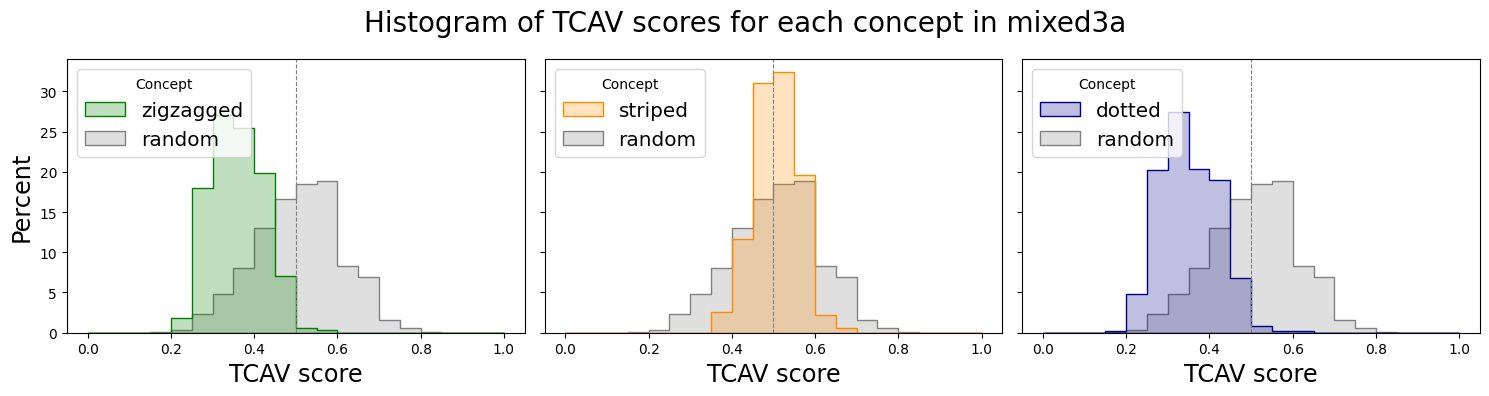

Now overwritting and saving figure


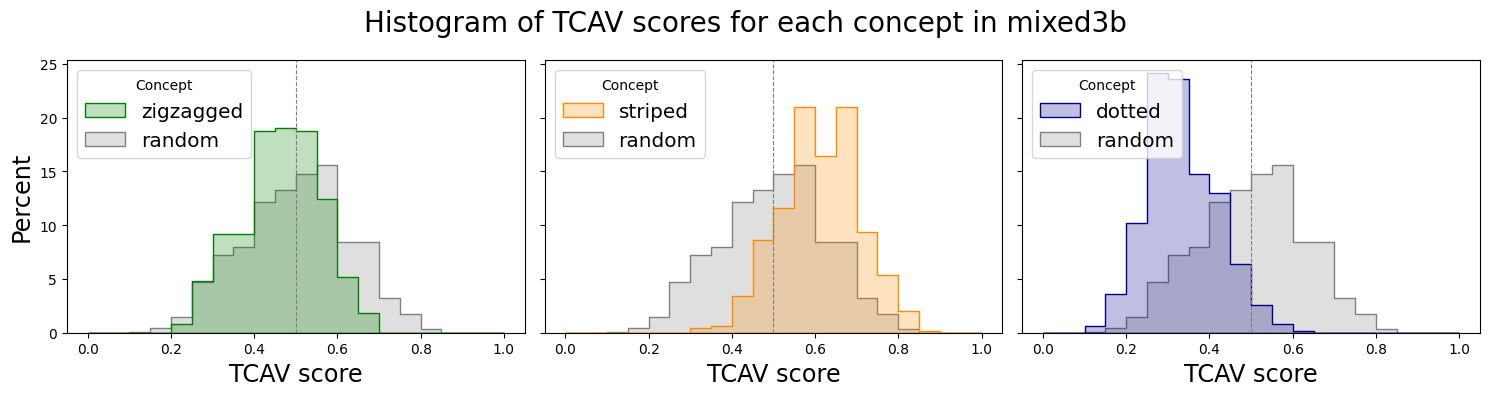

Now overwritting and saving figure


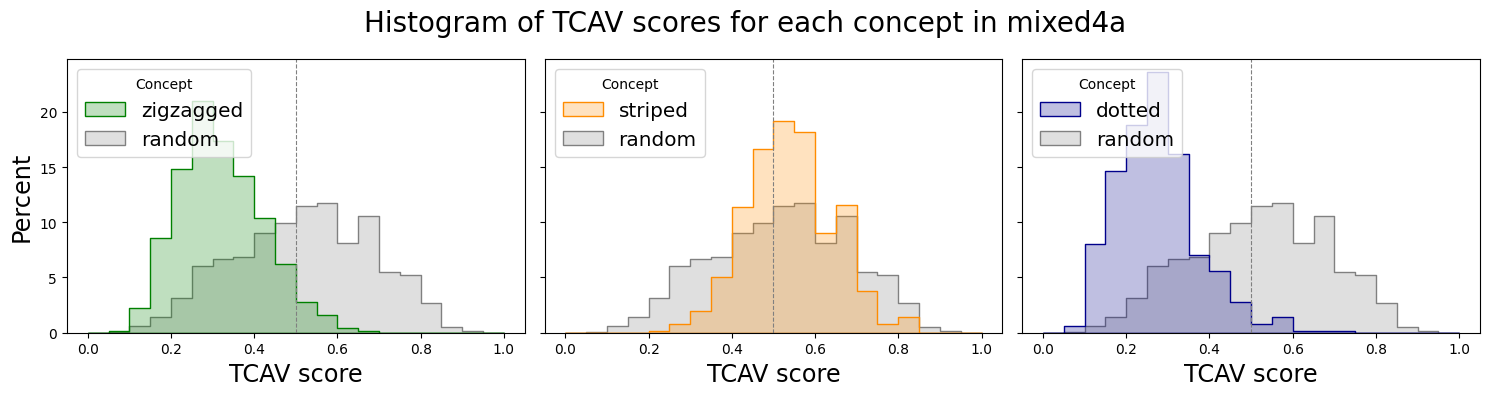

Now overwritting and saving figure


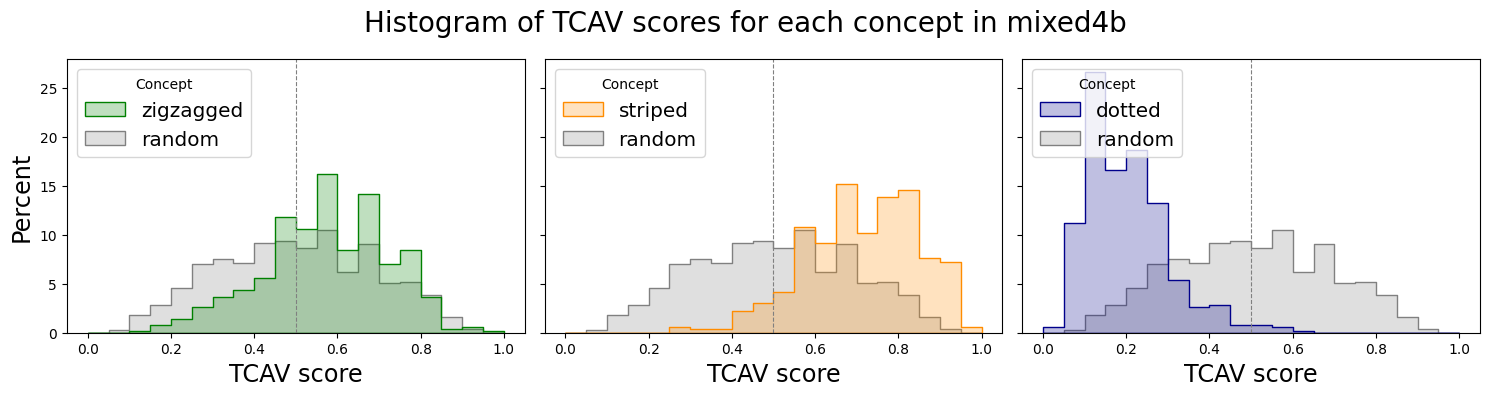

Now overwritting and saving figure


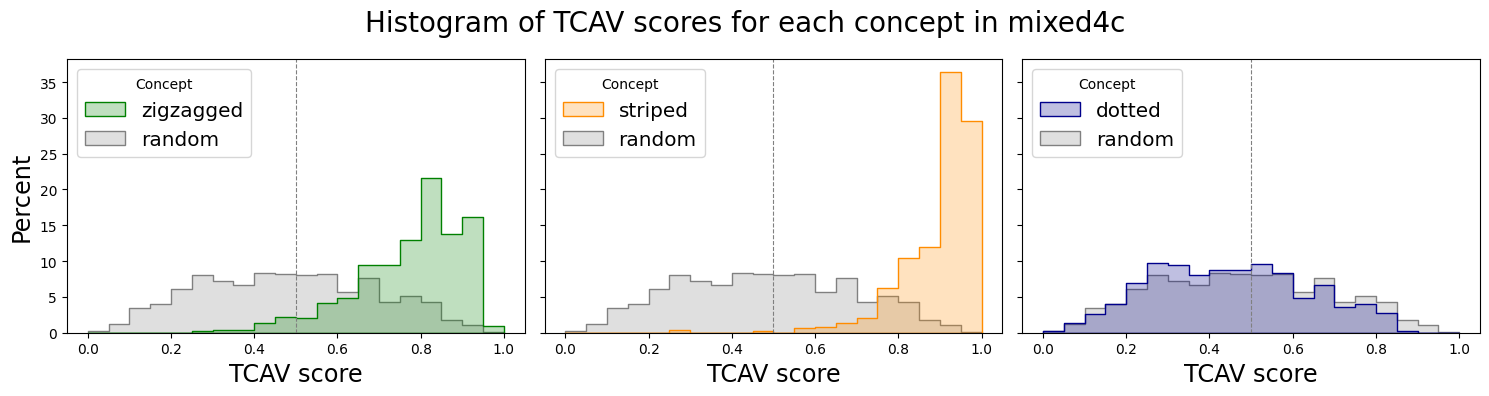

Now overwritting and saving figure


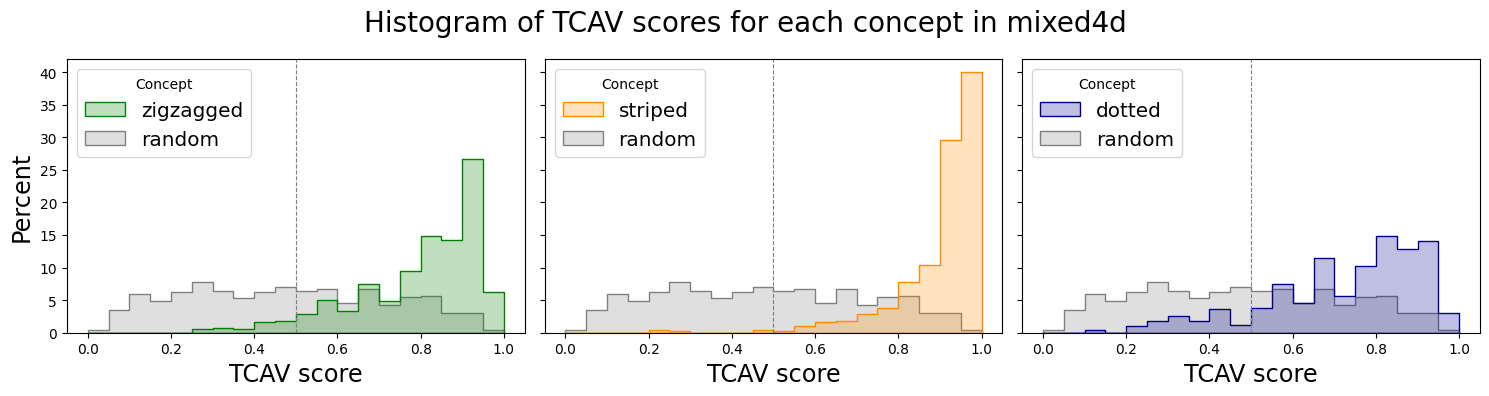

Now overwritting and saving figure


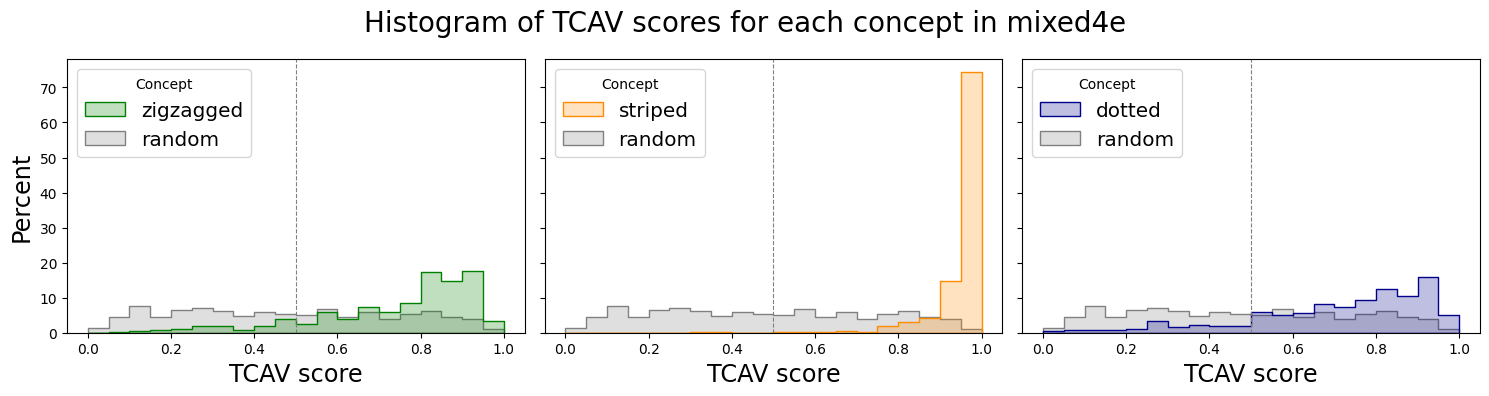

Now overwritting and saving figure


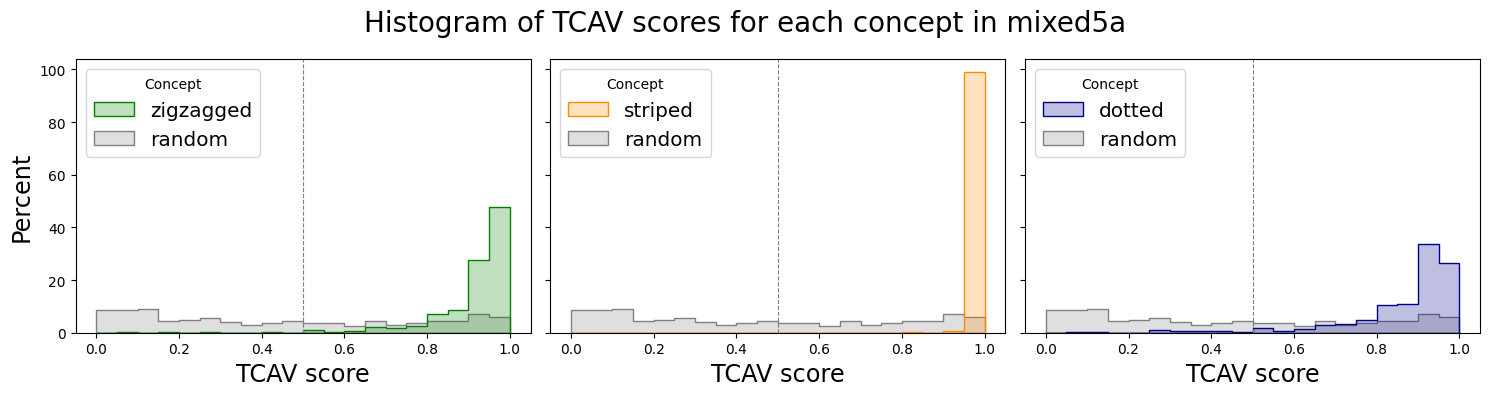

Now overwritting and saving figure


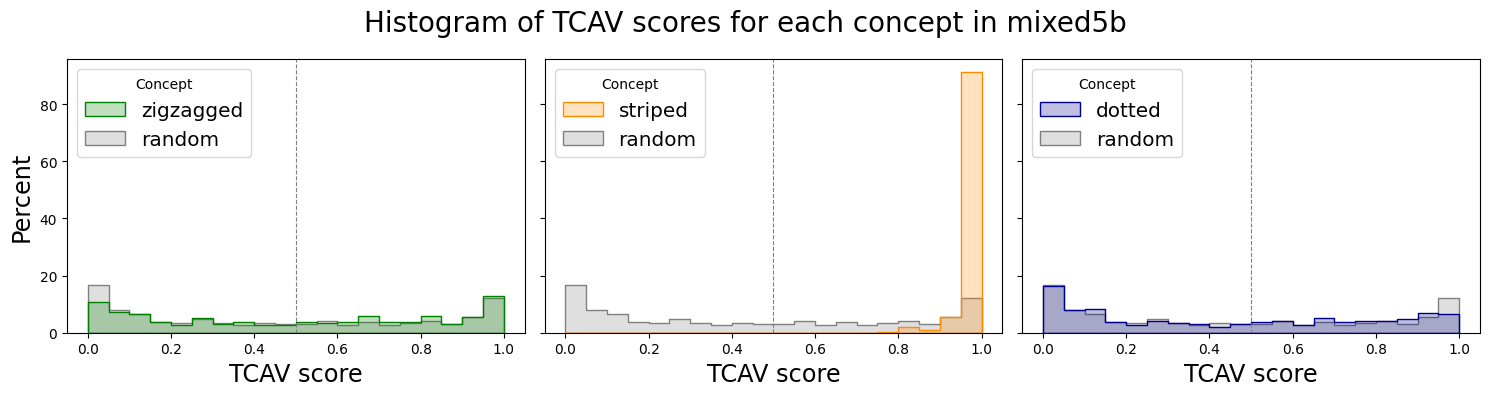

Now overwritting and saving figure


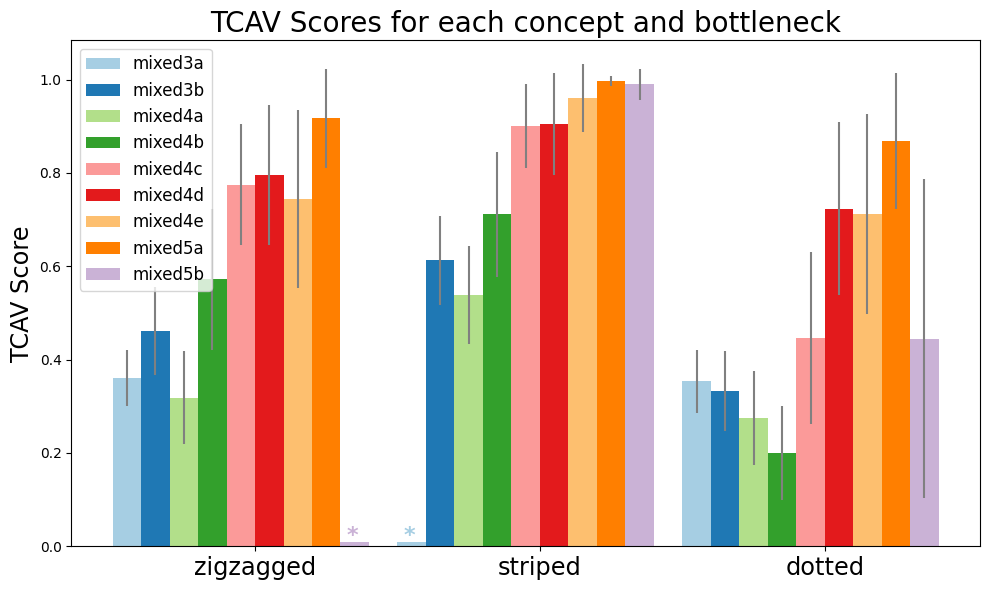

In [3]:
t_test_mean = 0.5 # None # if value given this will be a 1 sample t-test
bonferroni_nr = 2 #2
alternative = 'two-sided' # 'less' # 'greater' 
distribution_info = utils_plot.plot_results(data, num_random_exp=10, plot_hist = True,min_p_val=0.05, bonferroni_nr = bonferroni_nr,
alternative = alternative, t_test_mean = t_test_mean , save_fig = True)

In [6]:
# create 4 df with correct column names
layers = ['mixed3a', 'mixed3b', 'mixed4a', 'mixed4b', 'mixed4c', 'mixed4d','mixed4e', 'mixed5a', 'mixed5b']
idx = ['mean','std','p-value']

df_dot = pd.DataFrame(index = layers, columns = [np.array(['dotted']*3),np.array(idx)], dtype = 'float')
df_str = pd.DataFrame(index = layers, columns = [np.array(['striped']*3),np.array(idx)], dtype = 'float')
df_zig = pd.DataFrame(index = layers, columns = [np.array(['zigzagged']*3),np.array(idx)], dtype = 'float')
df_ran = pd.DataFrame(index = layers, columns = [np.array(['random']*3),np.array(idx)], dtype = 'float')

In [7]:

val_list = ['bn_vals','bn_stds','p-value']#,'significant']
for layer in layers:
    for v, value in enumerate(val_list):
        for i in range(3):
            if i == 0:
                df_dot.loc[layer,'dotted'][v] = distribution_info[layer][value][i]
            elif i == 1:
                distribution_info[layer][value][i]
                df_str.loc[layer,'striped'][v] = distribution_info[layer][value][i]
            else:
                distribution_info[layer][value][i]
                df_zig.loc[layer,'zigzagged'][v] = distribution_info[layer][value][i]

In [8]:
for layer in layers:
    for i, val in enumerate(idx):
        df_ran.loc[layer,'random'][val] = distribution_info[layer]['random_p-value'][i]

In [9]:
pd.concat([df_dot,df_str,df_zig],axis = 1)

dotted                           striped                           \
            mean       std        p-value     mean       std        p-value   
mixed3a  0.36024  0.059883  4.500899e-204  0.01000  0.000000   2.356813e-01   
mixed3b  0.46136  0.094275   1.389027e-18  0.61244  0.094818   3.345723e-97   
mixed4a  0.31832  0.099996  3.415435e-160  0.53786  0.105011   5.944853e-15   
mixed4b  0.57248  0.151040   2.864318e-24  0.71120  0.134168  3.679882e-137   
mixed4c  0.77470  0.129592  1.020329e-186  0.90090  0.090458   0.000000e+00   
mixed4d  0.79546  0.150589  3.314647e-173  0.90450  0.108848  3.267877e-294   
mixed4e  0.74344  0.191008  1.289462e-106  0.95954  0.072793   0.000000e+00   
mixed5a  0.91704  0.105717  2.494610e-306  0.99758  0.010842   0.000000e+00   
mixed5b  0.01000  0.000000   9.874861e-01  0.98952  0.033826   0.000000e+00   

        zigzagged                           
             mean       std        p-value  
mixed3a   0.35318  0.066883  5.841494e-193  
mixed3b   0.33266  0.085678  2.004161e-172  
mixed4a   0.27520  0.100865  1.090617e-195  
mixed4b   0.19942  0.100201  1.231990e-251  
mixed4c   0.44708  0.184429   3.379681e-10  
mixed4d   0.72294  0.185223   4.221645e-99  
mixed4e   0.71206  0.213527   2.195221e-76  
mixed5a   0.86812  0.145487  4.767170e-219  
mixed5b   0.44460  0.341820   3.241369e-04

In [16]:
with open(f'SavedResults/imagenet_tcav_results/concept_mean_std_pval_bonferroni_{bonferroni_nr}.tex', 'w') as tf:
     tf.write(pd.DataFrame.to_latex(pd.concat([df_dot,df_str,df_zig],axis = 1),float_format="{:.3e}".format,
     label = 'app_tab:imagenet stat num concept'))

with open(f'SavedResults/imagenet_tcav_results/random_mean_std_pval_bonferroni_{bonferroni_nr}.tex', 'w') as tf:
     tf.write(pd.DataFrame.to_latex(df_ran,float_format="{:.3e}".format, label = 'app_tab:imagenet stat num random'))


/tmp/ipykernel_5382/511672689.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(pd.DataFrame.to_latex(pd.concat([df_dot,df_str,df_zig],axis = 1),float_format="{:.3e}".format,label = 'app_tab:imagenet stat num concept'))
/tmp/ipykernel_5382/511672689.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(pd.DataFrame.to_latex(df_ran,float_format="{:.3e}".format, label = 'app_tab:imagenet stat num random'))
